In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('results/translated_clean_text.csv')

In [5]:
df.shape

(122386, 5)

In [6]:
df.isnull().sum()

reviewId         0
comment          0
score            0
date             0
cleaned_text    57
dtype: int64

In [7]:
df.dropna(inplace=True)
df['cleaned_text'] = df['cleaned_text'].astype(str)

In [8]:
from sentence_transformers import SentenceTransformer
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SentenceTransformer('all-MiniLM-L6-v2', device=device)

embeddings = model.encode(df['cleaned_text'].tolist())
df['embeddings'] = embeddings.tolist()
df

C:\Users\Babli Dey\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,reviewId,comment,score,date,cleaned_text,embeddings
0,f1e2a08a-5c36-427f-9574-2d2c2f2d4a72,fornikite with no colombus wind daphnee,5,2025-01-03 15:21:55,fornikite colombus wind daphnee,"[-0.06170523539185524, 0.031495146453380585, -..."
1,5fef2461-0da9-47fc-8f61-6fe6ac426589,"Yes I, m",5,2025-01-03 15:16:05,yes,"[-0.1173570454120636, 0.0006453106179833412, 0..."
2,8255ef9d-52ab-4981-ad59-ff869650f60e,Adds popping up during movies,1,2025-01-03 15:16:01,add popping movie,"[-0.08244700729846954, -0.12836913764476776, -..."
3,6e26402d-b74f-41df-b9a4-7a92a6a76271,App will not open on Amazon Fire Tablet. I can...,1,2025-01-03 15:10:25,app open amazon fire tablet click profile app ...,"[0.03293464332818985, -0.04466792941093445, -0..."
4,dfe9f50c-5a61-4a40-a32a-8a3e5729f660,I haven't been able to use Netflix on my Googl...,1,2025-01-03 14:54:07,havent able use netflix google pixel pro since...,"[0.010272150859236717, -0.15713194012641907, 0..."
...,...,...,...,...,...,...
122381,a760ead9-e7aa-4ed1-a651-5c37c3600dac,i really like it! there are so many movies and...,5,2019-08-03 15:06:03,really like many movie kdramas watch,"[-0.09045106917619705, -0.013765351846814156, ..."
122382,4957f9e7-d7f4-4a52-9764-031cebcac83f,I love Netflix. I always enjoy my time using it.,5,2022-08-15 16:16:30,love netflix always enjoy time using,"[-0.042854852974414825, -0.08050081133842468, ..."
122383,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Sound quality is very slow of movies,1,2020-08-17 07:26:58,sound quality slow movie,"[0.03350399434566498, -0.09084277600049973, -0..."
122384,32870f7f-c461-4256-b602-75244ca60248,Rate is very expensive.. bcos we see netflix s...,1,2019-07-21 09:41:42,rate expensive bcos see netflix sunday charged...,"[-0.026978954672813416, -0.05417180061340332, ..."


C:\Users\Babli Dey\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


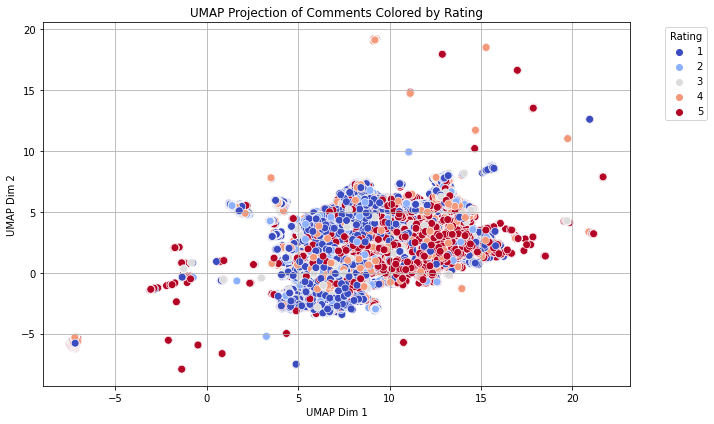

In [14]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# UMAP dimensionality reduction (same as before)
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = umap_model.fit_transform(embeddings)

# Add UMAP coordinates back to DataFrame
df['umap_x'] = embedding_2d[:, 0]
df['umap_y'] = embedding_2d[:, 1]

# Plot UMAP points colored by ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='umap_x', y='umap_y',
    hue='score',  # Replace with your actual rating column name
    palette='coolwarm',  # You can also try 'viridis', 'plasma', 'Spectral', etc.
    s=60
)
plt.title("UMAP Projection of Comments Colored by Rating")
plt.xlabel("UMAP Dim 1")
plt.ylabel("UMAP Dim 2")
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


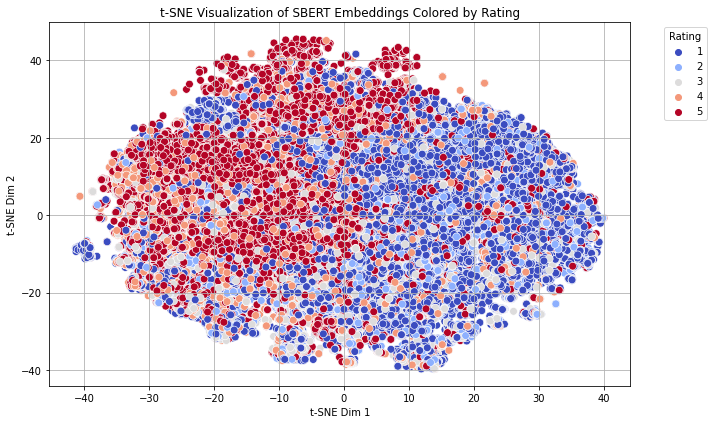

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
tsne_result = tsne.fit_transform(embeddings)

# Add t-SNE results to the DataFrame
df['tsne_x'] = tsne_result[:, 0]
df['tsne_y'] = tsne_result[:, 1]

# Plot with hue = score/rating column
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='tsne_x', y='tsne_y',
    hue='score',  # Replace 'rating' with your actual score column name
    palette='coolwarm',  # or try 'Spectral', 'viridis', etc.
    s=60
)
plt.title("t-SNE Visualization of SBERT Embeddings Colored by Rating")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
